### Importing Required Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Taking Random data

In [4]:
mean1 = np.array([1,0])
cov1 = np.array([[1,0.1],[0.1, 1.5]])
distribution1 = np.random.multivariate_normal(mean1, cov1, 500)

mean2 = np.array([6,5])
cov2 = np.array([[1.3,0.1],[0.1, 1.5]])
distribution2 = np.random.multivariate_normal(mean2, cov2, 500)

### Ploting The Data

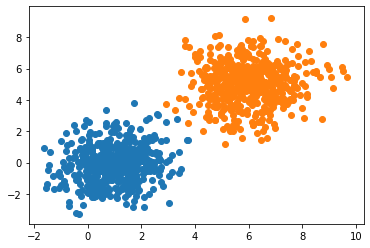

In [20]:
plt.scatter(distribution1[:,0], distribution1[:,-1])
plt.scatter(distribution2[:,0],distribution2[:,-1])
plt.show()

In [51]:
data = np.zeros((1000,3))
data[:500,:2] = distribution1
data[500:,:2] = distribution2
data[500:, -1] = 1     #rest 500 of the last column will be 0 .

print(data.shape)

(1000, 3)


In [52]:
data.mean(axis = 0)  #mean of each elements of each column.


array([3.49043104, 2.49743355, 0.5       ])

In [53]:
print(data[:20])
np.random.shuffle(data)  # we have shuffled the data to prevent biasing
data[:20]

[[ 0.28260815 -0.47070893  0.        ]
 [ 2.65930862  0.19018907  0.        ]
 [ 1.90640941  0.82905217  0.        ]
 [ 1.69123703  0.46334933  0.        ]
 [ 0.14601874 -2.21738866  0.        ]
 [ 0.85375093 -0.38828247  0.        ]
 [ 0.45688145  0.47825628  0.        ]
 [ 1.43647781  0.43350911  0.        ]
 [ 0.02759413 -0.22105815  0.        ]
 [ 0.15225596  0.8979414   0.        ]
 [ 1.52280358 -1.05680873  0.        ]
 [ 0.71528344  0.42758197  0.        ]
 [ 3.68184027  1.41878548  0.        ]
 [ 1.05578946 -0.01853055  0.        ]
 [ 1.89289297  0.66641198  0.        ]
 [ 1.88998952 -1.81173167  0.        ]
 [ 0.54017628  0.13856091  0.        ]
 [ 1.70278963  0.30682704  0.        ]
 [ 1.15178584  0.24704399  0.        ]
 [ 0.94887246  0.09917185  0.        ]]


array([[ 1.47511456, -0.95511736,  0.        ],
       [ 6.94580107,  6.21283158,  1.        ],
       [ 6.50190265,  4.77701496,  1.        ],
       [ 5.40000437,  3.02568516,  1.        ],
       [ 4.17311811,  6.76765753,  1.        ],
       [ 1.15825691,  1.74125485,  0.        ],
       [ 4.14634318,  3.76584124,  1.        ],
       [ 6.72685131,  6.38870484,  1.        ],
       [ 1.74981218,  0.35511294,  0.        ],
       [ 2.32899249,  0.12118613,  0.        ],
       [ 5.70859349,  6.93934655,  1.        ],
       [ 1.78201495,  0.09230116,  0.        ],
       [ 1.78145309, -0.77253607,  0.        ],
       [ 5.30461757,  5.99141374,  1.        ],
       [ 6.53292903,  1.99174323,  1.        ],
       [ 1.71989632,  0.89381895,  0.        ],
       [ 4.92345084,  4.81371359,  1.        ],
       [ 1.29185796, -1.66080754,  0.        ],
       [ 5.41675876,  6.17223529,  1.        ],
       [ 1.58127678, -1.52405587,  0.        ]])

In [63]:
def distance(a,b):
    return(np.sum((b-a)**2))**0.5
    

In [92]:
def knn(x_train, y_train, test_point, k = 7):
    vals= []
    for i in range(x_train.shape[0]):
        d = distance(x_train[i], test_point)
        vals.append([d, y_train[i]])
        
    sorted_label = sorted(vals, key = lambda r: r[0])
    neigh = np.asarray(sorted_label)[:k,-1]
    freq = np.unique(neigh, return_counts=True)
    index = freq[1].argmax()
    return freq[0][index]

In [93]:
x_train = data[:,:2]
y_train = data[:,-1]
test_point = np.array([4,3])
knn(x_train, y_train, test_point)

1.0

In [98]:
split = int(0.75 * data.shape[0])
x_train = data[:split,:2]
y_train = data[:split, -1]
x_test = data[split:, :2]
y_test = data[split:,-1]

In [110]:
def accuracy(k):
    prediction = []
    for i in range (x_test.shape[0]):
        test_point = x_test[i]
        predicted_label = knn(x_train, y_train, test_point, k)
        prediction.append(predicted_label)
    pred = np.asarray(prediction)
        
    return 100 * (y_test == pred).sum() / (pred.shape[0])

In [111]:
accuracy(3)

100.0

### Lets Do it Using Sklearn

In [114]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=5)
neighbors.fit(x_train, y_train)
neighbors.score(x_test, y_test)
    

1.0